100%|██████████| 150/150 [00:11<00:00, 13.16it/s]


39.844291649006834
20.0


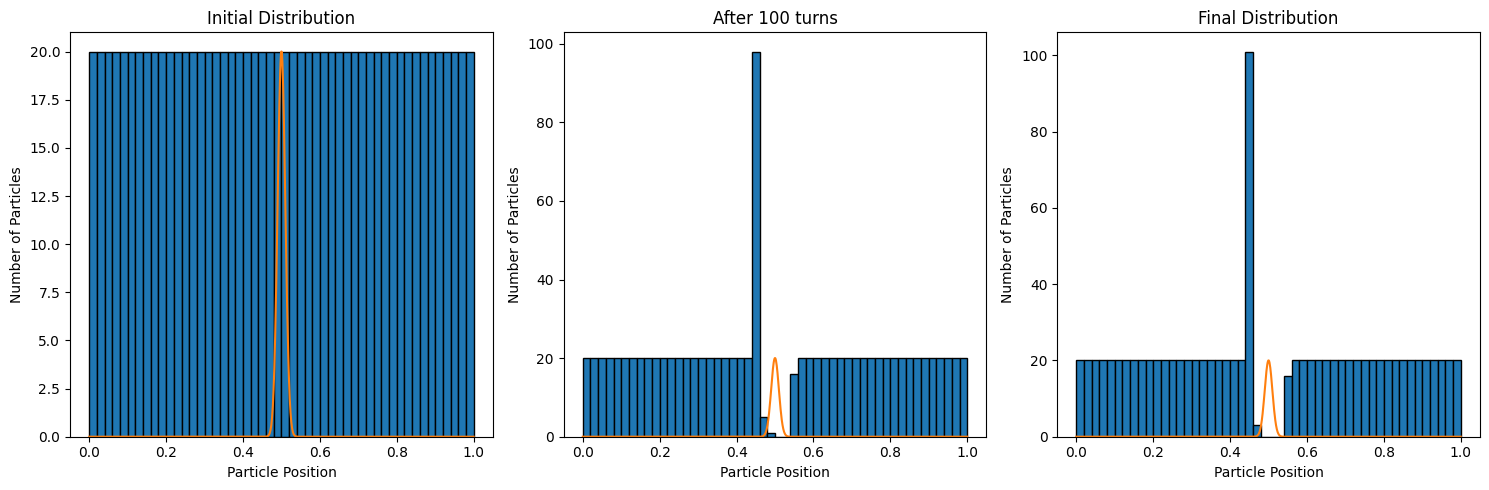

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

# Parameters
num_particles = 1000  # Number of particles
num_turns = 150
kick_strength = 0.01  # Positive kick to create a hole

# Initial uniform distribution
particles_init = np.linspace(0, 1, num_particles)
particles = particles_init.copy()

mean = 0.5
std_dev = 0.01
# gaussian = np.random.normal(loc=mean, scale=std_dev, size=num_particles)
particle_distributions = np.zeros((num_turns, num_particles))

bins=50

# Simulation loop
for turn in tqdm(range(num_turns)):
    
    # Loop over individual particles
    for particle_index in range(num_particles):
        # Generate a random number for the particle
        random_number = np.random.rand()
        
        # Check if the random number is smaller than the Gaussian value for that particle
        # If yes, give it a negative kick to create a hole
        if random_number < norm.pdf(particles[particle_index], loc=mean, scale=std_dev):
            particles[particle_index] -= kick_strength
    
    particle_distributions[turn] = particles.copy()

gaussian_height=max(norm.pdf(particles_init, loc=mean, scale=std_dev))
print(gaussian_height)
max_height_init=num_particles/bins
print(max_height_init)
scale=max_height_init/gaussian_height

# Plot the initial, intermediate, and final particle distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(particles_init, bins=bins, edgecolor='black')
plt.plot(particles_init, scale*norm.pdf(particles_init, loc=mean, scale=std_dev), label='Gaussian PDF')
plt.title('Initial Distribution')
plt.xlabel('Particle Position')
plt.ylabel('Number of Particles')

# Intermediate plot at the end of the simulation
plt.subplot(1, 3, 2)
plt.hist(particle_distributions[100], bins=bins, edgecolor='black')
plt.plot(particles_init, scale*norm.pdf(particles_init, loc=mean, scale=std_dev), label='Gaussian PDF')
plt.title(f'After {100} turns')
plt.xlabel('Particle Position')
plt.ylabel('Number of Particles')

plt.subplot(1, 3, 3)
plt.hist(particles, bins=bins, edgecolor='black')
plt.plot(particles_init, scale*norm.pdf(particles_init, loc=mean, scale=std_dev), label='Gaussian PDF')
plt.title('Final Distribution')
plt.xlabel('Particle Position')
plt.ylabel('Number of Particles')

plt.tight_layout()
plt.show()


In [2]:
from ipywidgets import interact, IntSlider


# Function to update the plot based on the slider value
def update_plot(turn):
    plt.figure(figsize=(15, 5))
    plt.hist(particle_distributions[turn], bins=bins, edgecolor='black')
    plt.plot(particles_init, scale*norm.pdf(particles_init, loc=mean, scale=std_dev), label='Gaussian PDF')
    plt.title(f'After {turn} turns')
    plt.xlabel('Particle Position')
    plt.ylabel('Number of Particles')
    plt.show()

# Create an interactive slider using ipywidgets
interact(update_plot, turn=IntSlider(min=0, max=num_turns-1, step=1, value=0))


interactive(children=(IntSlider(value=0, description='turn', max=149), Output()), _dom_classes=('widget-intera…

<function __main__.update_plot(turn)>